In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dermatology_csv.csv')

In [3]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [5]:
df.shape

(366, 35)

In [8]:
x = df.iloc[:,0:33]
x

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,0,3,0,0,0,1,0
1,3,3,3,2,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,0,2,3,2,0,0,2,3
3,2,2,2,0,0,0,0,0,3,2,...,0,0,3,0,0,0,0,0,3,0
4,2,3,2,2,2,2,0,2,0,0,...,0,2,2,3,2,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,0
362,3,2,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,2,0
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,3,0,0,2,3
364,2,1,3,1,2,3,0,2,0,0,...,0,3,0,2,0,1,0,0,2,3


In [9]:
y = df["class"]
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [12]:
y_pred = knn.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[17,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  3,  0,  0],
       [ 0,  0, 16,  0,  0,  0],
       [ 0,  1,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  5]], dtype=int64)

In [26]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

# rec_1 = recall_score(y_test,y_pred)
acc_1 = accuracy_score(y_test,y_pred)
# f1_1 = f1_score(y_test,y_pred)

print(acc_1)

0.9459459459459459


In [27]:

prec_1 = precision_score(y_test,y_pred,average='micro')
print(prec_1)

0.9459459459459459


In [29]:
rec_1 = recall_score(y_test,y_pred,average='micro')
rec_1

0.9459459459459459

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svc = make_pipeline(StandardScaler(),SVC(gamma='auto')) #???????
svc.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [31]:
y1_pred = svc.predict(x_test)

In [32]:
cm1 = confusion_matrix(y_test,y1_pred)
cm1

array([[17,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0,  0],
       [ 1,  0, 15,  0,  0,  0],
       [ 0,  1,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  5]], dtype=int64)

In [53]:
acc_svc = accuracy_score(y_test,y1_pred)*100
acc_svc

95.94594594594594

In [34]:

prec_2 = precision_score(y_test,y1_pred,average='micro')
print(prec_2)

0.9594594594594594


<AxesSubplot:>

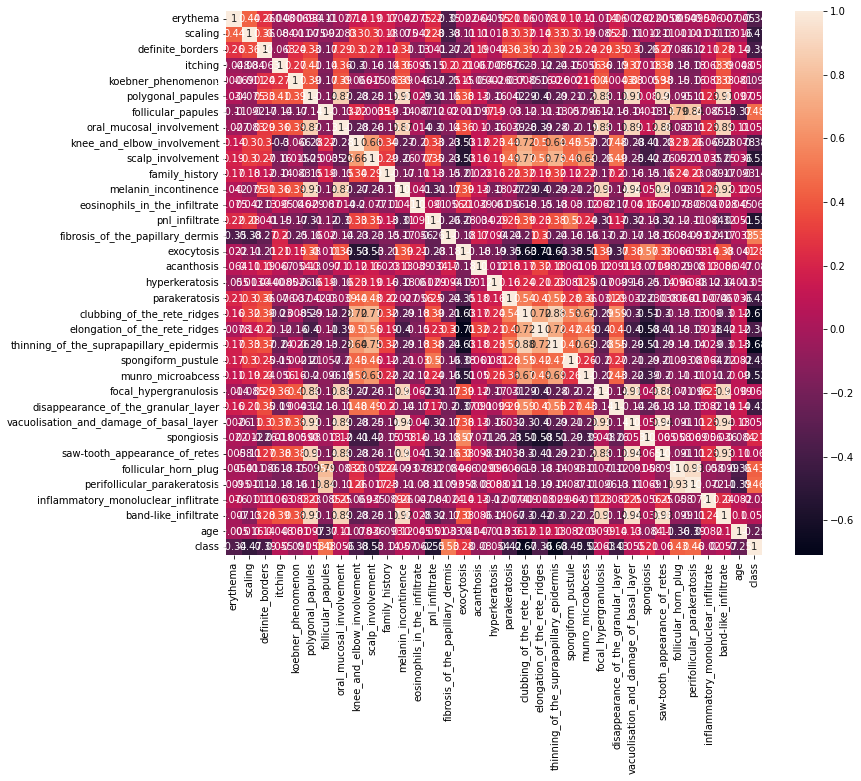

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [1]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [45]:
y_pred_nb = gnb.predict(x_test)

In [64]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_nb)*100)
acc_gb = metrics.accuracy_score(y_test, y_pred_nb)*100
prec_gb = precision_score(y_test,y_pred_nb,average='micro')

Gaussian Naive Bayes model accuracy(in %): 89.1891891891892


In [79]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred_rc = clf.predict(x_test)
prec_rc = precision_score(y_test,y_pred_rc,average='micro')
# metrics are used to find accuracy or error


# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL RANDOM FOREST: ", accuracy_score(y_test, y_pred_rc)*100)
acc_rc =accuracy_score(y_test, y_pred_rc)*100

ACCURACY OF THE MODEL RANDOM FOREST:  94.5945945945946


In [80]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(x,y)

In [81]:
y_pred_dt = decision_tree.predict(x_test)
prec_rc = precision_score(y_test,y_pred_dt,average='micro')


# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL Decision Tree: ", accuracy_score(y_test, y_pred_dt)*100)
acc_dt =accuracy_score(y_test, y_pred_dt)*100

ACCURACY OF THE MODEL Decision Tree:  58.108108108108105


In [83]:
from tabulate import tabulate
mydata = [
    ["KNN",acc_1*100,prec_1],
    ["SVM",acc_svc,prec_2],
    ["Gaussian ",acc_gb,prec_gb],
    ["Random Forest",acc_rc,prec_rc],
    ["Decision Tree",acc_dt]
]
 
# create header
head = ["model","accuracy","precision"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------+------------+-------------+
| model         |   accuracy |   precision |
+===============+============+=============+
| KNN           |    94.5946 |    0.945946 |
+---------------+------------+-------------+
| SVM           |    95.9459 |    0.959459 |
+---------------+------------+-------------+
| Gaussian      |    89.1892 |    0.891892 |
+---------------+------------+-------------+
| Random Forest |    94.5946 |    0.581081 |
+---------------+------------+-------------+
| Decision Tree |    58.1081 |             |
+---------------+------------+-------------+
